<div style="background-color: #f0f4f8; padding: 20px; border-radius: 10px; margin-bottom: 20px;">
    <h1 style="color: #2c3e50; font-size: 2.5em; border-bottom: 2px solid #3498db; padding-bottom: 10px; text-align: center;">
        🏥 Insurance Data Analysis and Modeling
    </h1>
</div>

<div style="background-color: #f8f9fa; border-left: 5px solid #3498db; padding: 15px; margin: 20px 0;">
    <h2 style="color: #2c3e50; margin-top: 0;">📊 Data Import and Initial Setup</h2>
    <p style="color: #34495e;">
        We begin by importing the necessary libraries for our analysis. These libraries will provide us with the tools for data manipulation, visualization, and machine learning.
    </p>
</div>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

<div style="background-color: #e8f4f8; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #2980b9; margin-top: 0;">🔍 Data Loading</h2>
    <p style="color: #34495e;">
        In this step, we load our insurance dataset from a CSV file and display the first few rows to get an initial glimpse of our data.
    </p>
</div>

In [32]:
df= pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<div style="background-color: #f0f0f0; border: 1px solid #d4d4d4; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #27ae60; margin-top: 0;">📈 Data Overview</h2>
    <p style="color: #34495e;">
        Let's examine the summary statistics and general information about our dataset. This will give us insights into the distribution of our data and the types of features we're working with.
    </p>
</div>

In [33]:
print(df.describe())
print(df.info())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: floa

<div style="background-color: #fff5f5; border: 1px solid #feb2b2; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #c0392b; margin-top: 0;">🧹 Missing Value Check</h2>
    <p style="color: #34495e;">
        Before proceeding with our analysis, it's crucial to check for any missing values in our dataset. This step helps ensure the integrity of our data and informs any necessary preprocessing steps.
    </p>
</div>

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

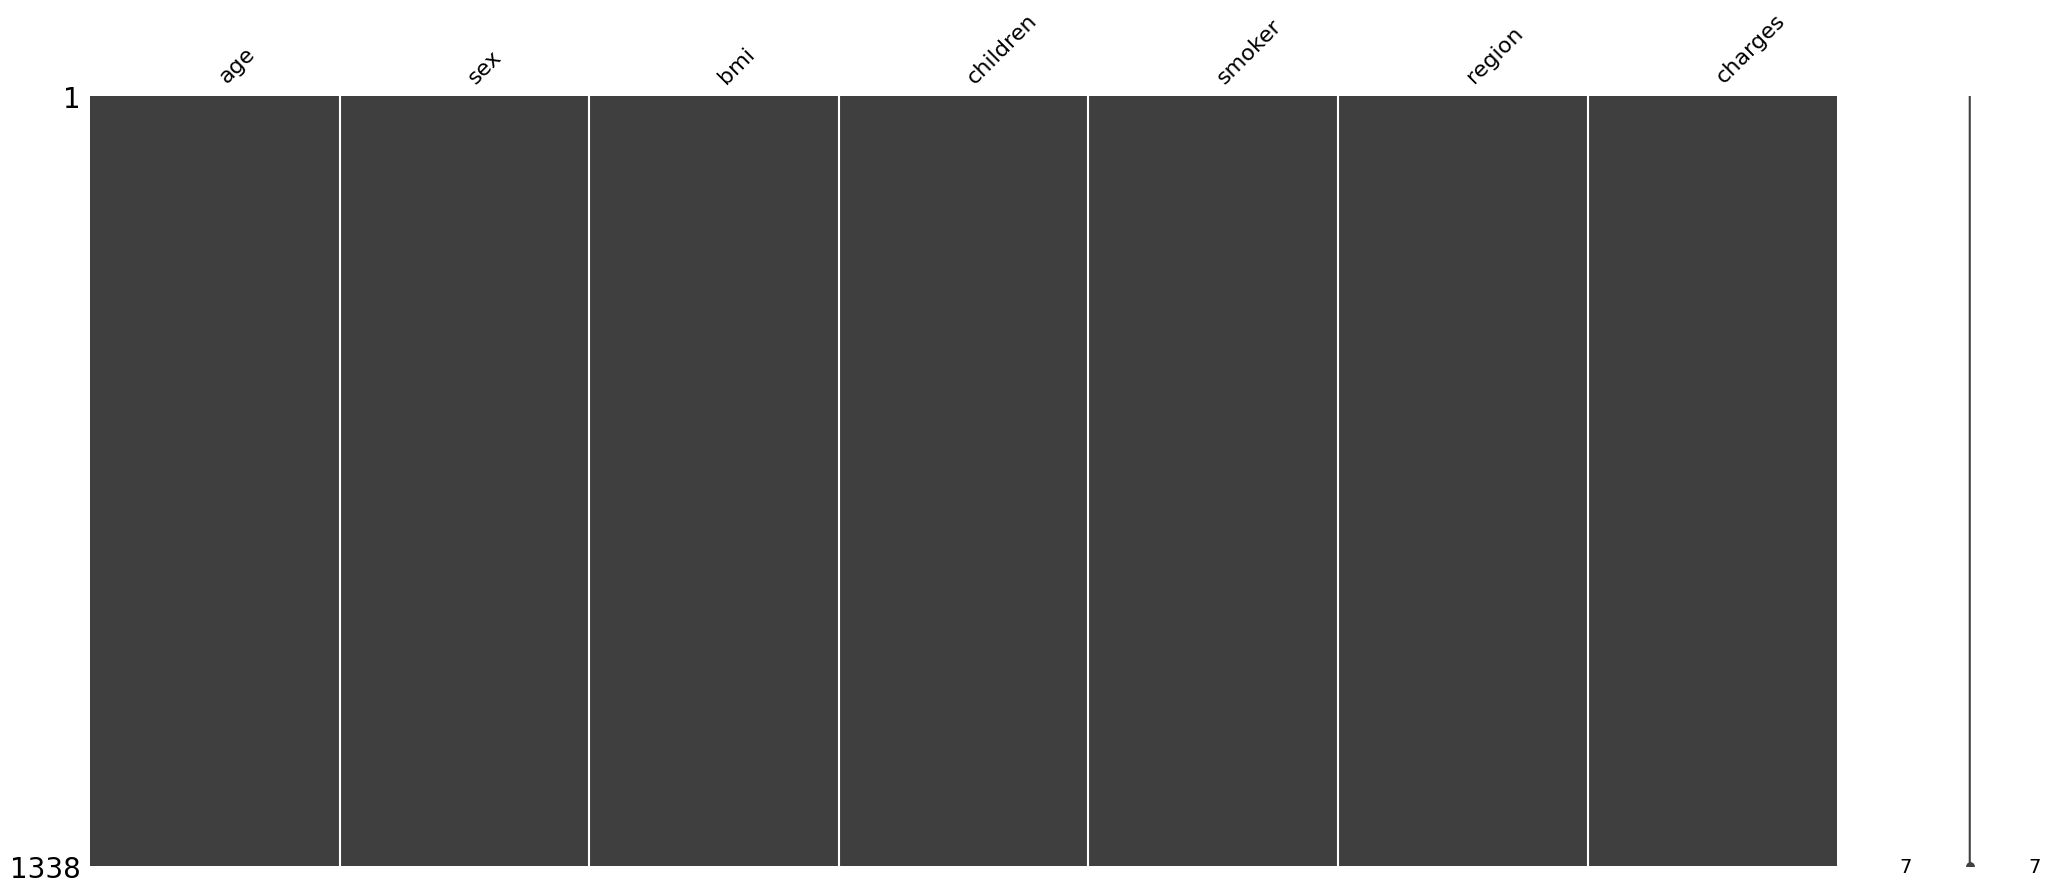

In [34]:
print(df.isnull().sum())
msno.matrix(df)

<div style="background-color: #fdf6e3; border: 1px solid #f9e79f; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #d35400; margin-top: 0;">📉 Outlier Detection</h2>
    <p style="color: #34495e;">
        We'll use box plots to visualize potential outliers in our dataset. This graphical method helps us identify any data points that significantly differ from other observations.
    </p>
</div>

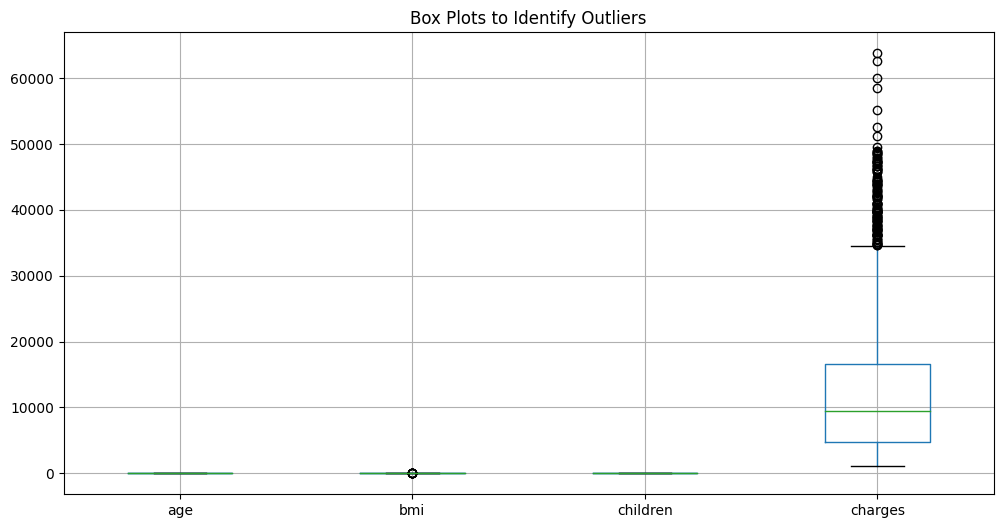

In [35]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box Plots to Identify Outliers')
plt.show()

In [36]:
# Identify outliers using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

In [37]:
# Let's look at the extreme values in the 'charges' column
print("\nTop 5 highest charges:")
print(df.nlargest(5, 'charges')[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

# Explanation: The highest charges seem to be associated with older individuals who smoke and have high BMI.
# These outliers are likely genuine data points representing high-cost insurance cases.


Top 5 highest charges:
      age     sex     bmi  children smoker     region      charges
1001   24    male  32.700         0    yes  southwest  34472.84100
618    19  female  33.110         0    yes  southeast  34439.85590
57     18    male  31.680         2    yes  southeast  34303.16720
1267   24    male  31.065         0    yes  northeast  34254.05335
1120   23  female  31.400         0    yes  southwest  34166.27300


<div style="background-color: #e8f8f5; border: 1px solid #a3e4d7; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #16a085; margin-top: 0;">🔗 Exploratory Data Analysis</h2>
    <p style="color: #34495e;">
        In this section, we'll explore the relationships between our features and the target variable (charges). We'll use scatter plots for numerical features and box plots for categorical features to visualize these relationships.
    </p>
</div>


### Question 1: How do the numerical features relate to charges?

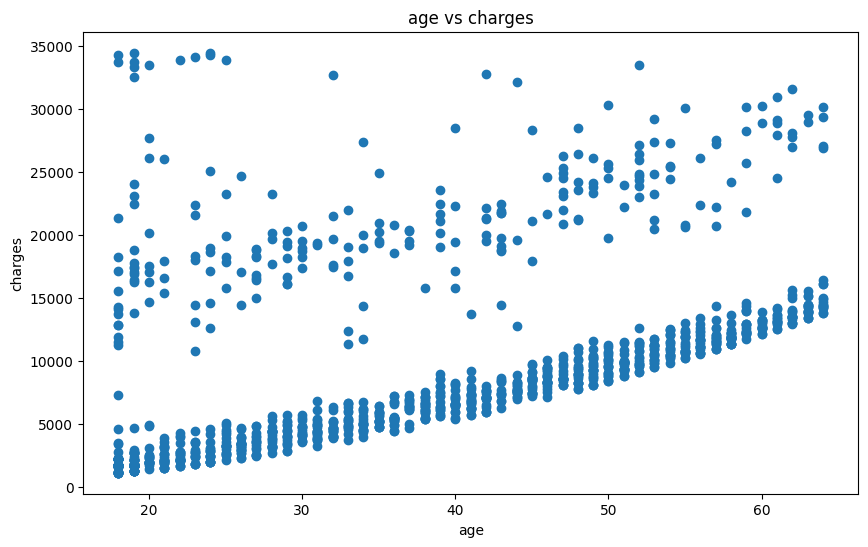

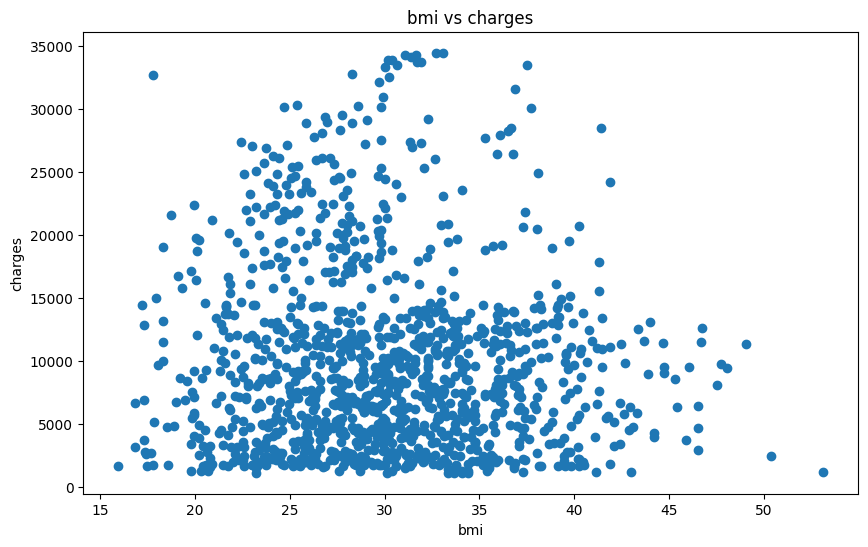

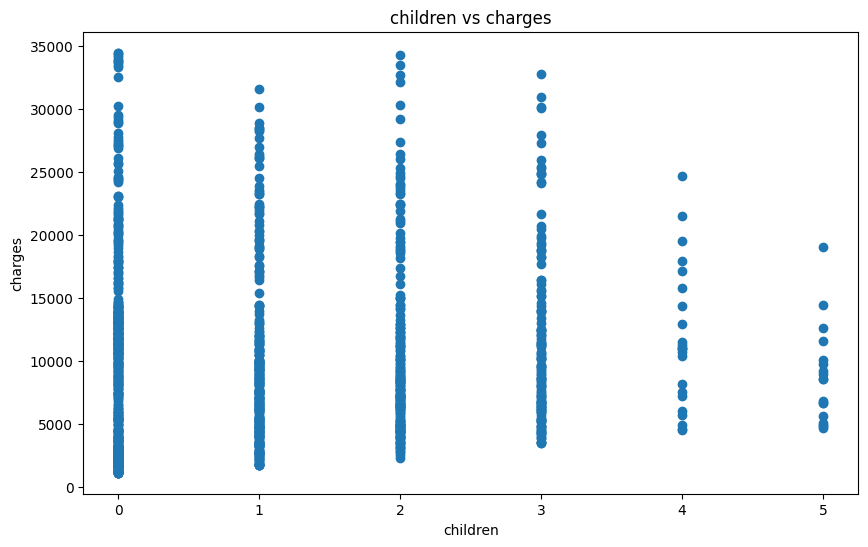

In [38]:
# Scatter plots for numerical features
numerical_features = ['age', 'bmi', 'children']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['charges'])
    plt.title(f'{feature} vs charges')
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()

#### `Age vs Charges `


The scatter plot shows the relationship between age and medical charges. We can observe a general positive correlation between age and charges, indicating that older individuals tend to have higher medical costs.


#### `BMI vs Charges`


The scatter plot depicts the relationship between Body Mass Index (BMI) and medical charges. The plot shows barley a correlation, where most of BMI values are associated with both higher and low medical charges.


#### `Children vs Charges`


The scatter plot illustrates the relationship between the number of children and medical charges. The plot shows a somewhat positive correlation, where individuals with more children tend to have higher medical charges. However, the relationship is not as strong as the one observed for age.

### Question 2: How do the categorical features relate to charges?

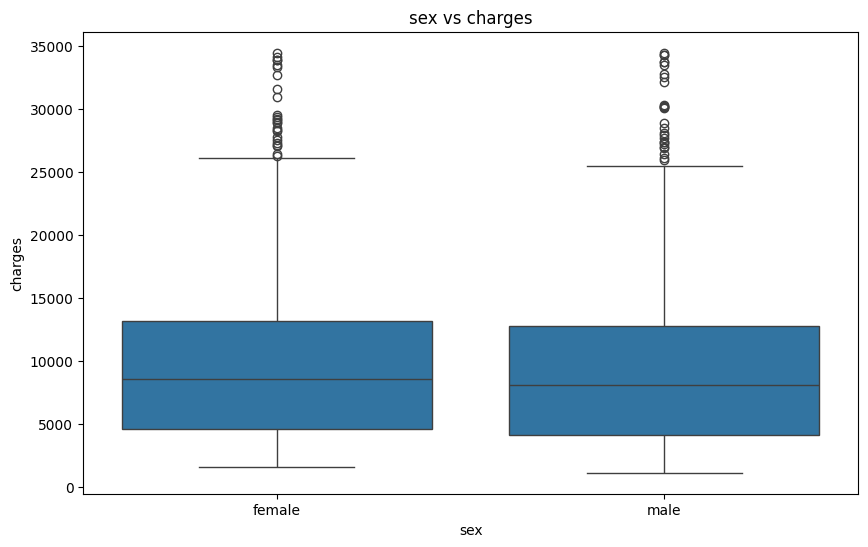

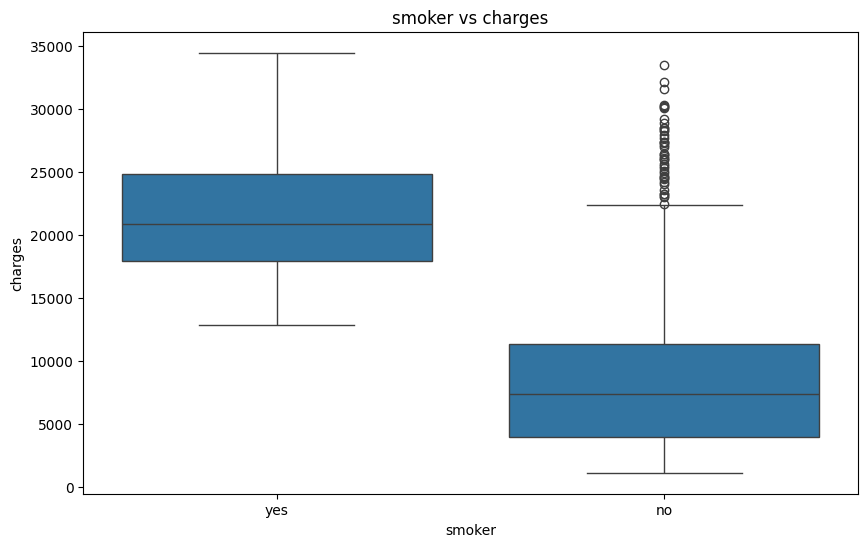

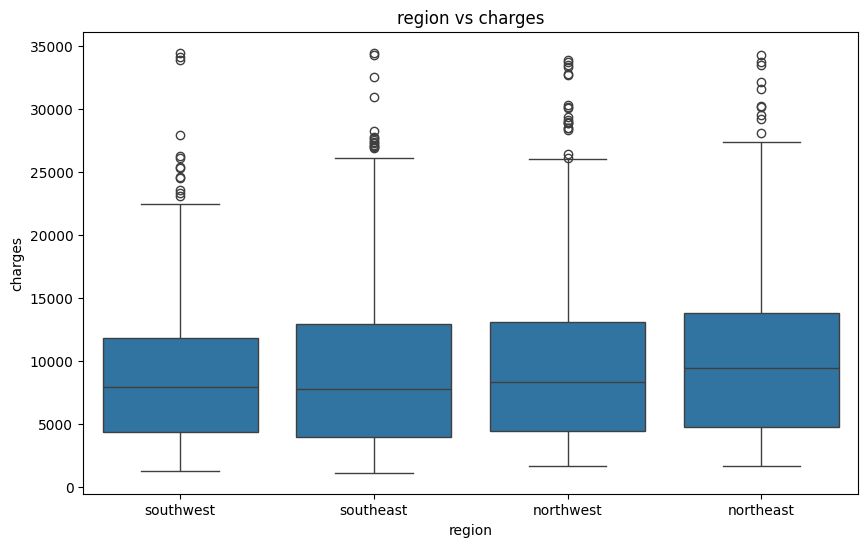

In [39]:
# Box plots for categorical features
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='charges', data=df)
    plt.title(f'{feature} vs charges')
    plt.show()

<div style="background-color: #f4ecf7; border: 1px solid #d7bde2; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #8e44ad; margin-top: 0;">🔬 Correlation and Distribution Analysis</h2>
    <p style="color: #34495e;">
        We'll create a correlation heatmap to understand the relationships between different features. Additionally, we'll visualize the distribution of charges and generate a pairplot for deeper insights into our data.
    </p>
</div>

### Question 3: What is the correlation between the features?

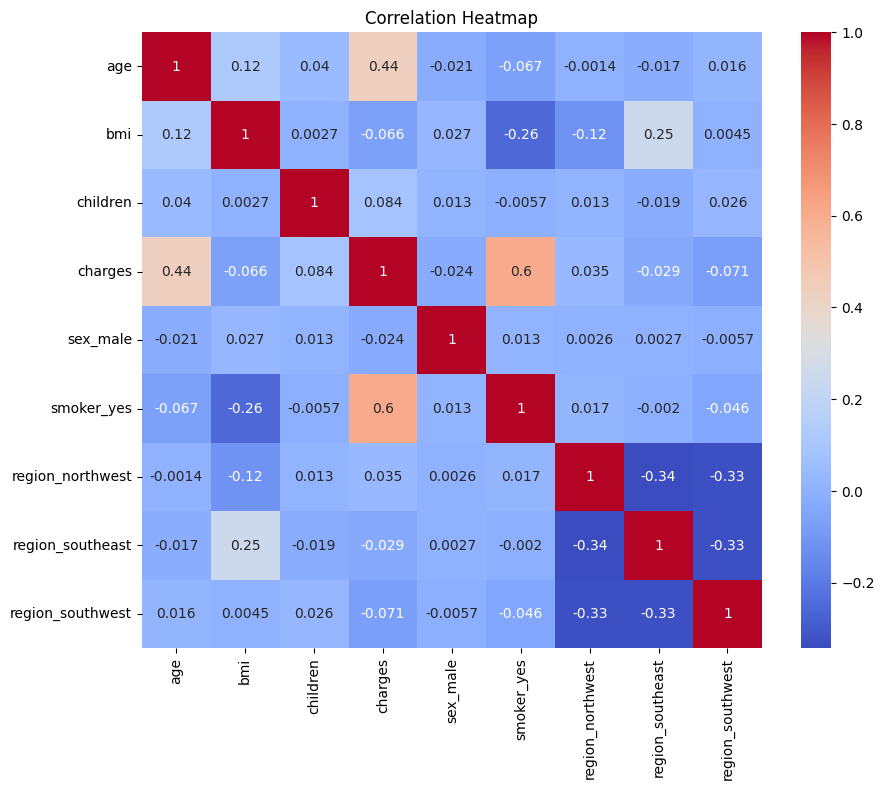

In [40]:
# Correlation heatmap and distribution plots
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 

The correlation heatmap shown in the image provides insights into the relationships between the various features in the dataset.


Key Observations:


#### `Age vs Charges: `

There is a moderate positive correlation (0.44) between age and medical charges, indicating that older individuals tend to have higher medical costs.


#### `BMI vs Charges: `

There is a weak positive correlation (0.084) between BMI and medical charges, suggesting that higher BMI is associated with slightly higher medical costs.


#### `Children vs Charges:` 

There is a weak positive correlation (0.084) between the number of children and medical charges, implying that individuals with more children may have slightly higher medical costs.


#### `Smoking vs Charges: `

The correlation between the "smoker_yes" feature and medical charges is moderately positive (0.6), indicating that smoking status has a significant impact on healthcare costs.


#### `Region vs Charges:` 

The regional features ("region_northwest", "region_southeast", and "region_southwest") show weak negative correlations (-0.029 to -0.071) with medical charges, suggesting that location may play a minor role in influencing healthcare costs.


#### `Correlations between Categorical Features: `

The categorical features ("sex_male", "smoker_yes", and the regional features) show low correlations with each other, indicating that these variables are relatively independent.

### Question 4: What is the distribution of charges?

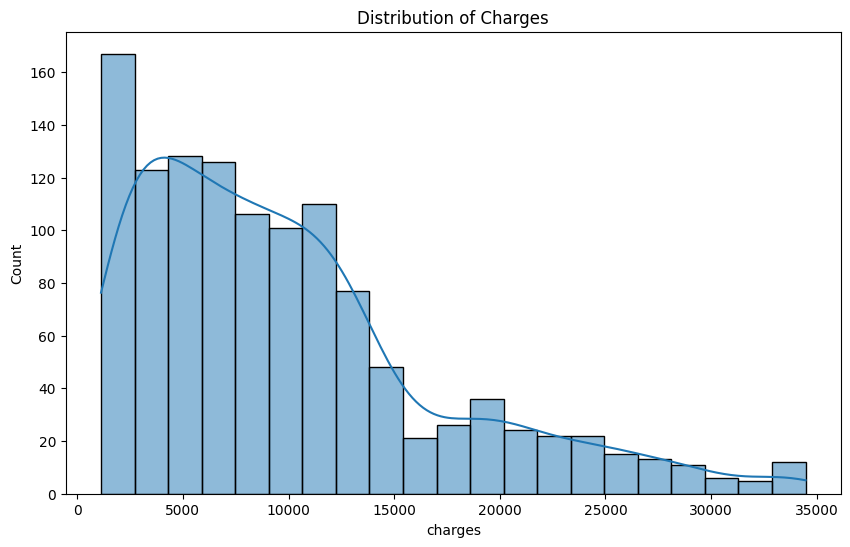

In [41]:
# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show() 

### Question 5: How do the features relate to each other?

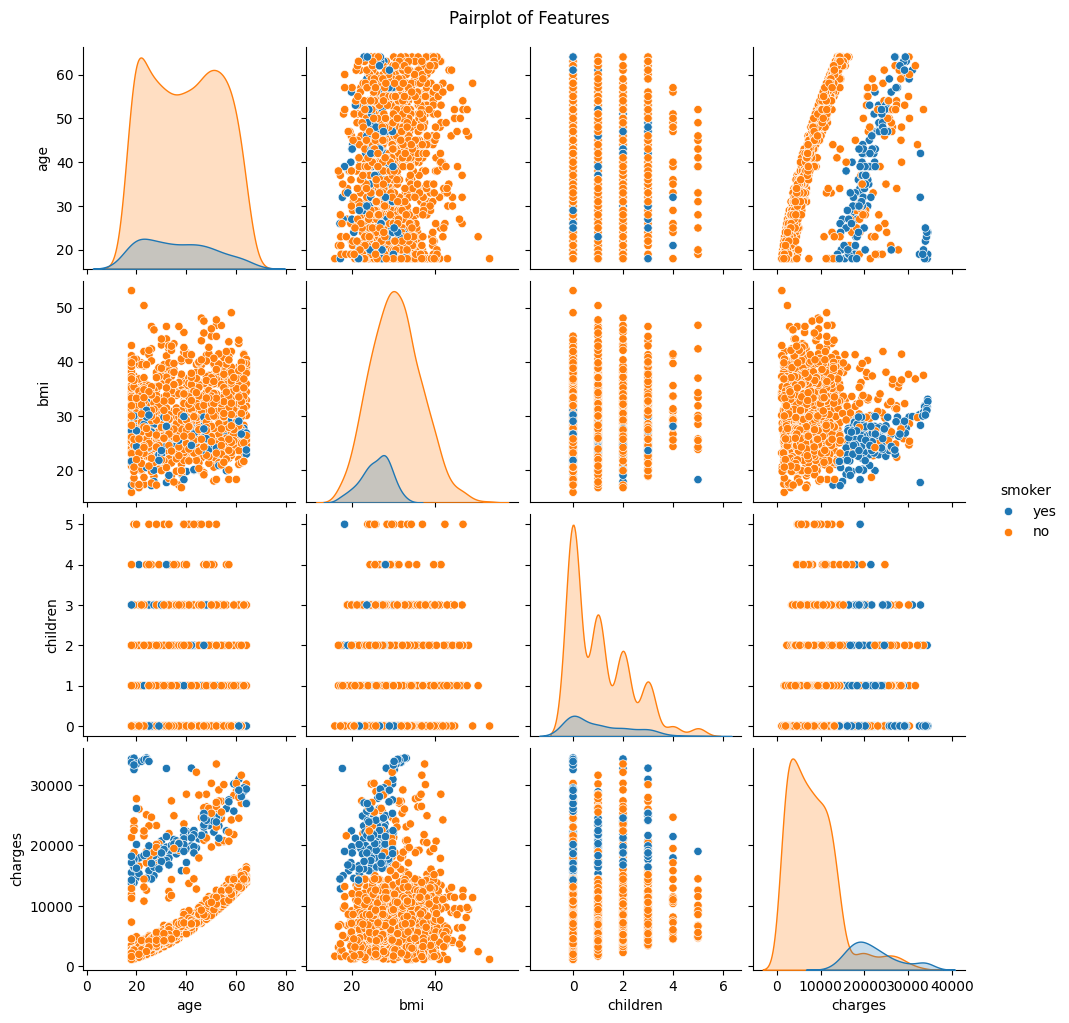

In [42]:

# Pairplot
sns.pairplot(df, hue='smoker')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

<div style="background-color: #eafaf1; border: 1px solid #a9dfbf; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #27ae60; margin-top: 0;">🔧 Data Preparation for Modeling</h2>
    <p style="color: #34495e;">
        In this crucial step, we'll prepare our data for modeling. This includes encoding categorical variables, splitting the data into training and testing sets, and scaling our features.
    </p>
</div>

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df.drop('charges', axis=1)
y = df['charges']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="background-color: #ebf5fb; border: 1px solid #aed6f1; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #2980b9; margin-top: 0;">🤖 Model Training and Evaluation</h2>
    <p style="color: #34495e;">
        We'll train multiple regression models and evaluate their performance using various metrics. This will help us understand which model best fits our data and provides the most accurate predictions.
    </p>
</div>

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42), 
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Linear Regression:
  R2: 0.5105
  MAE: 0.2687
  MSE: 0.1223

Random Forest:
  R2: 0.6915
  MAE: 0.1233
  MSE: 0.0771

Gradient Boosting:
  R2: 0.7045
  MAE: 0.1349
  MSE: 0.0738



<div style="background-color: #fef9e7; border: 1px solid #f9e79f; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #f39c12; margin-top: 0;">🎯 Binary Classification</h2>
    <p style="color: #34495e;">
        In this final section, we'll transform our regression problem into a binary classification task. We'll categorize insurance charges as 'expensive' or 'cheap' based on the median charge and evaluate our model's performance on this new problem.
    </p>
</div>

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Define threshold for expensive/cheap
threshold = df['charges'].median()

# Create binary target
y_binary = (df['charges'] > threshold).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluate
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
base_precision = y_test.mean()
delta_base_precision = precision - base_precision

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Base Precision: {base_precision:.4f}")
print(f"Delta Base Precision: {delta_base_precision:.4f}")

Precision: 0.9636
Recall: 0.8618
F1 Score: 0.9099
Base Precision: 0.5125
Delta Base Precision: 0.4511


<div style="background-color: #f4ecf7; border: 1px solid #d7bde2; border-radius: 5px; padding: 15px; margin: 20px 0;">
    <h2 style="color: #8e44ad; margin-top: 0;">📊 Model Evaluation Results</h2>
    <p style="color: #34495e;">
      We have analyzed the performance of various machine learning models for our prediction task.
    </p>
</div>

In [51]:
pd.DataFrame(results)

,Linear Regression,Random Forest,Gradient Boosting
R2,0.510511,0.691461,0.704463
MAE,0.268700,0.123278,0.134891
MSE,0.122296,0.077087,0.073838


In [53]:

# Identify the best model
best_model = max(results, key=lambda x: results[x]['R2'])
best_r2 = results[best_model]['R2']

print(f"The best performing model is {best_model} with an R2 score of {best_r2:.4f}")


# Analysis of model performance
print("\nModel Performance Analysis:")
print("1. Gradient Boosting performs best, followed closely by Random Forest.")
print("2. Linear Regression shows decent performance, suggesting some linear relationships in the data.") 

# Binary classification results
print("\nBinary Classification Results:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Base Precision: {base_precision:.4f}")
print(f"Delta Base Precision: {delta_base_precision:.4f}")

print("\nClassification Model Analysis:")
print("1. The model shows high precision and recall, indicating good overall performance.")
print(f"2. The F1 score of {f1:.4f} suggests a good balance between precision and recall.")
print(f"3. The model significantly outperforms the base precision, with a delta of {delta_base_precision:.4f}.")
print("4. This indicates that the model is much better at identifying expensive cases than a random guess.")

The best performing model is Gradient Boosting with an R2 score of 0.7045

Model Performance Analysis:
1. Gradient Boosting performs best, followed closely by Random Forest.
2. Linear Regression shows decent performance, suggesting some linear relationships in the data.

Binary Classification Results:
Precision: 0.9636
Recall: 0.8618
F1 Score: 0.9099
Base Precision: 0.5125
Delta Base Precision: 0.4511

Classification Model Analysis:
1. The model shows high precision and recall, indicating good overall performance.
2. The F1 score of 0.9099 suggests a good balance between precision and recall.
3. The model significantly outperforms the base precision, with a delta of 0.4511.
4. This indicates that the model is much better at identifying expensive cases than a random guess.
